# FNC 6.3 IVP Systems
This notebook contains Python implementations and solutions for the programming parts of the **Systems** section.

**Utilities included**
- Explicit Euler for vector IVPs (used in Exercise 3, with `n=1000`).
- A clean fixed-step RK4 solver for general systems (used in Exercises 4–5).
- Minimal plotting helpers (matplotlib only, one figure per plot).


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def euler_vec(f, span, u0, n):
    '''
    Explicit Euler for u' = f(s, u), where u is a vector.
    Returns s grid (n+1,), and U array (n+1, m).
    '''
    a, b = float(span[0]), float(span[1])
    m = int(np.size(u0))
    h = (b - a) / n
    s = a + h*np.arange(n+1)
    U = np.empty((n+1, m), dtype=float)
    U[0] = np.asarray(u0, dtype=float)
    for k in range(n):
        U[k+1] = U[k] + h*np.asarray(f(s[k], U[k]), dtype=float)
    return s, U

def rk4_vec(f, span, u0, n):
    '''
    Fixed-step classical RK4 for u' = f(s, u) with vector u.
    Returns s grid (n+1,), and U array (n+1, m).
    '''
    a, b = float(span[0]), float(span[1])
    m = int(np.size(u0))
    h = (b - a) / n
    s = a + h*np.arange(n+1)
    U = np.empty((n+1, m), dtype=float)
    U[0] = np.asarray(u0, dtype=float)
    for k in range(n):
        sk, uk = s[k], U[k]
        k1 = np.asarray(f(sk, uk))
        k2 = np.asarray(f(sk + 0.5*h, uk + 0.5*h*k1))
        k3 = np.asarray(f(sk + 0.5*h, uk + 0.5*h*k2))
        k4 = np.asarray(f(sk + h,     uk + h*k3))
        U[k+1] = uk + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return s, U

def plot_two_curves(x, y1, y2, title, xlabel, ylabel1, ylabel2, label1=None, label2=None):
    plt.figure(figsize=(6,4))
    if label1 is None: label1 = ylabel1
    if label2 is None: label2 = ylabel2
    plt.plot(x, y1, label=label1)
    plt.plot(x, y2, label=label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(f"{ylabel1} / {ylabel2}")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_errors(x, e1, e2, title, xlabel):
    plt.figure(figsize=(6,4))
    plt.plot(x, e1, label="component 1 error")
    plt.plot(x, e2, label="component 2 error")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("error")
    plt.grid(True)
    plt.legend()
    plt.show()

## Exercise 3 — Euler (n=1000), solution and derivative together, plus componentwise error

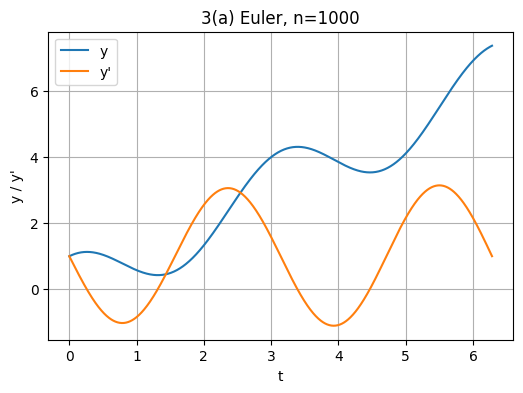

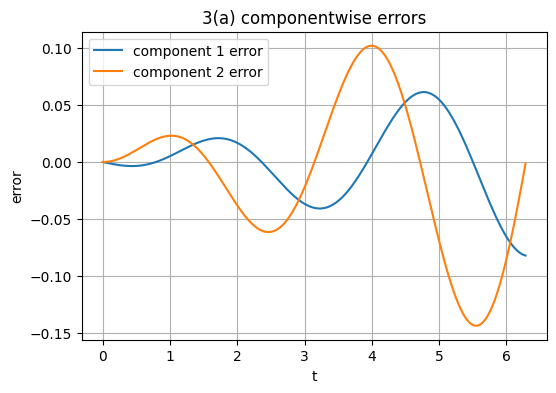

In [2]:
# (a) y'' + 4y = 4t, 0 < t < 2π, y(0)=1, y'(0)=1;  ŷ(t) = t + cos(2t)
f = lambda t, u: np.array([u[1], 4.0*t - 4.0*u[0]])
y_exact = lambda t: t + np.cos(2.0*t)
yp_exact = lambda t: 1.0 - 2.0*np.sin(2.0*t)

span = (0.0, 2.0*np.pi); u0 = np.array([1.0, 1.0]); n = 1000
t, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(t, y, yp, "3(a) Euler, n=1000", "t", "y", "y'")
e1 = y_exact(t) - y
e2 = yp_exact(t) - yp
plot_errors(t, e1, e2, "3(a) componentwise errors", "t")

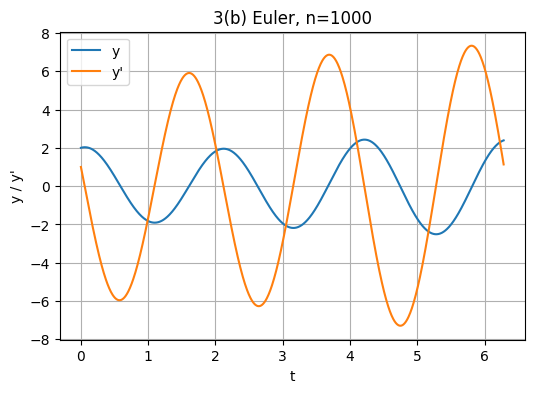

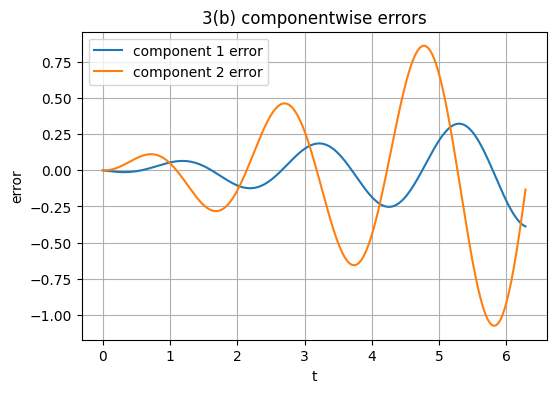

In [3]:
# (b) y'' + 9y = sin(2t), 0 < t < 2π, y(0)=2, y'(0)=1
f = lambda t, u: np.array([u[1], np.sin(2.0*t) - 9.0*u[0]])
y_exact = lambda t: (1.0/5.0)*np.sin(3.0*t) + 2.0*np.cos(3.0*t) + (1.0/5.0)*np.sin(2.0*t)
yp_exact = lambda t: (3.0/5.0)*np.cos(3.0*t) - 6.0*np.sin(3.0*t) + (2.0/5.0)*np.cos(2.0*t)

span = (0.0, 2.0*np.pi); u0 = np.array([2.0, 1.0]); n = 1000
t, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(t, y, yp, "3(b) Euler, n=1000", "t", "y", "y'")
e1 = y_exact(t) - y
e2 = yp_exact(t) - yp
plot_errors(t, e1, e2, "3(b) componentwise errors", "t")

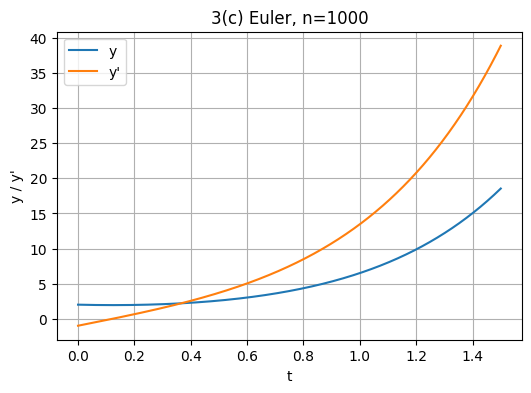

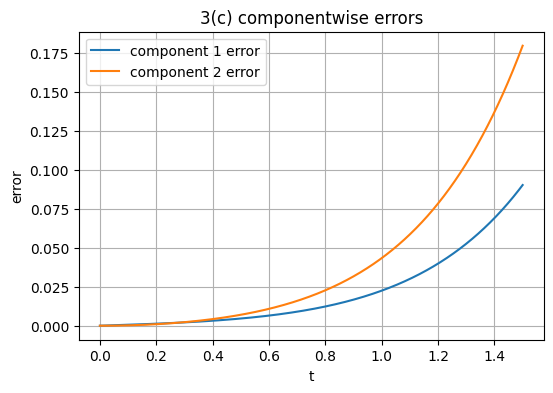

In [4]:
# (c) y'' - 4y = 4t, 0 < t < 1.5, y(0)=2, y'(0)=-1;  ŷ(t) = e^{2t} + e^{-2t} - t
f = lambda t, u: np.array([u[1], 4.0*t + 4.0*u[0]])
y_exact = lambda t: np.exp(2.0*t) + np.exp(-2.0*t) - t
yp_exact = lambda t: 2.0*np.exp(2.0*t) - 2.0*np.exp(-2.0*t) - 1.0

span = (0.0, 1.5); u0 = np.array([2.0, -1.0]); n = 1000
t, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(t, y, yp, "3(c) Euler, n=1000", "t", "y", "y'")
e1 = y_exact(t) - y
e2 = yp_exact(t) - yp
plot_errors(t, e1, e2, "3(c) componentwise errors", "t")

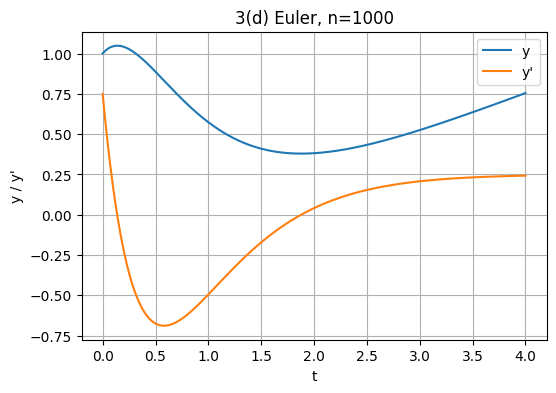

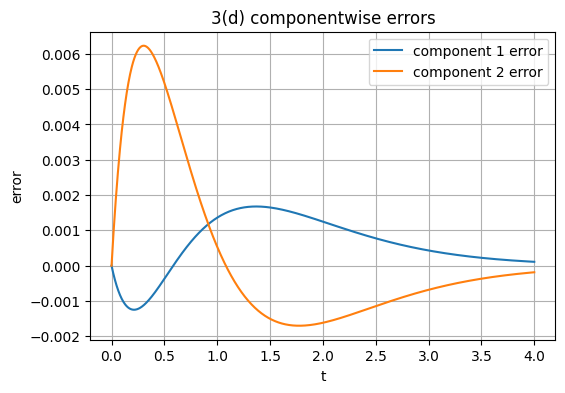

In [5]:
# (d) y'' + 4y' + 4y = t, 0 < t < 4, y(0)=1, y'(0)=3/4
f = lambda t, u: np.array([u[1], t - 4.0*u[1] - 4.0*u[0]])
y_exact = lambda t: (3.0*t + 1.25)*np.exp(-2.0*t) + 0.25*(t - 1.0)
yp_exact = lambda t: (0.5 - 6.0*t)*np.exp(-2.0*t) + 0.25

span = (0.0, 4.0); u0 = np.array([1.0, 0.75]); n = 1000
t, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(t, y, yp, "3(d) Euler, n=1000", "t", "y", "y'")
e1 = y_exact(t) - y
e2 = yp_exact(t) - yp
plot_errors(t, e1, e2, "3(d) componentwise errors", "t")

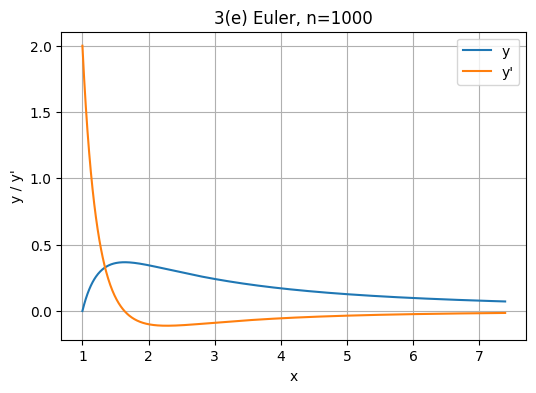

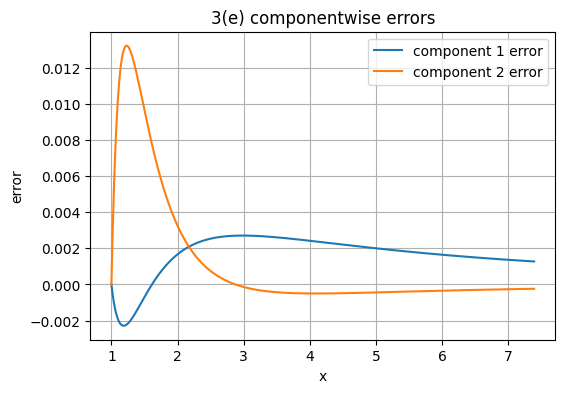

In [6]:
# (e) x^2 y'' + 5x y' + 4y = 0,  1 < x < e^2,  y(1)=0, y'(1)=2;  ŷ(x) = (2/x^2) ln x
f = lambda x, u: np.array([u[1], -(5.0*x*u[1] + 4.0*u[0])/(x**2)])
y_exact = lambda x: (2.0/(x**2))*np.log(x)
yp_exact = lambda x: 2.0*(1.0 - 2.0*np.log(x))/(x**3)

span = (1.0, math.e**2); u0 = np.array([0.0, 2.0]); n = 1000
x, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(x, y, yp, "3(e) Euler, n=1000", "x", "y", "y'")
e1 = y_exact(x) - y
e2 = yp_exact(x) - yp
plot_errors(x, e1, e2, "3(e) componentwise errors", "x")

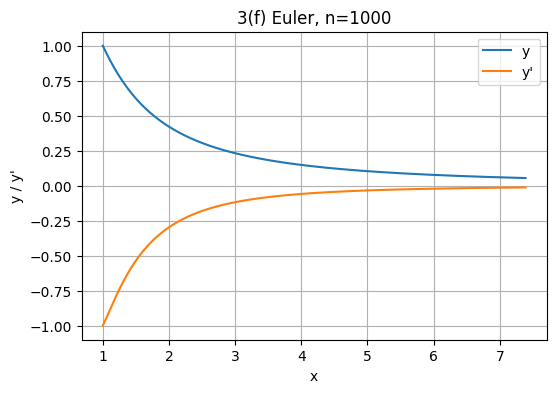

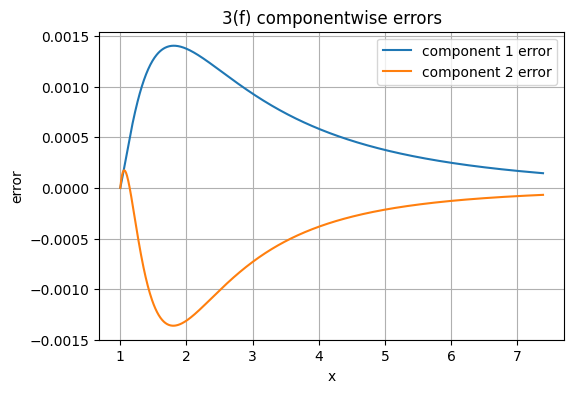

In [7]:
# (f) x^2 y'' + 5x y' + 4y = 0,  1 < x < e^2,  y(1)=1, y'(1)=-1;  ŷ(x) = x^{-2}(1 + ln x)
f = lambda x, u: np.array([u[1], -(5.0*x*u[1] + 4.0*u[0])/(x**2)])
y_exact = lambda x: (1.0 + np.log(x))/(x**2)
yp_exact = lambda x: ( -1.0 - 2.0*np.log(x) )/(x**3)

span = (1.0, math.e**2); u0 = np.array([1.0, -1.0]); n = 1000
x, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(x, y, yp, "3(f) Euler, n=1000", "x", "y", "y'")
e1 = y_exact(x) - y
e2 = yp_exact(x) - yp
plot_errors(x, e1, e2, "3(f) componentwise errors", "x")

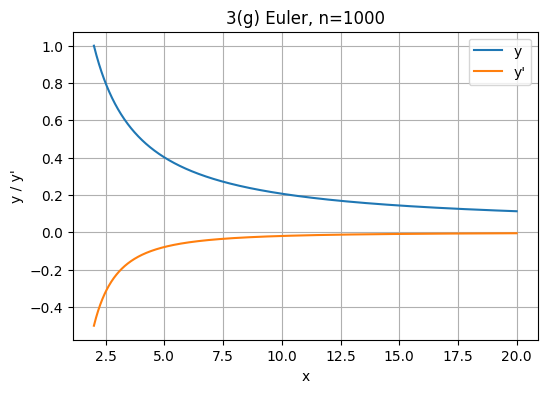

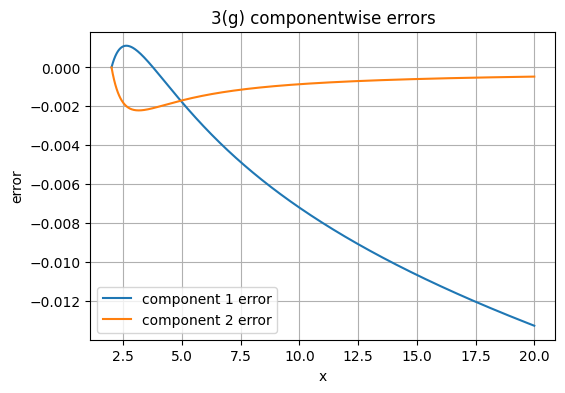

In [8]:
# (g) 2 x^2 y'' + 3x y' - y = 0,  2 < x < 20,  y(2)=1, y'(2)=-1/2;  ŷ(x) = 2/x
f = lambda x, u: np.array([u[1], (u[0] - 3.0*x*u[1])/(2.0*x**2)])
y_exact = lambda x: 2.0/x
yp_exact = lambda x: -2.0/(x**2)

span = (2.0, 20.0); u0 = np.array([1.0, -0.5]); n = 1000
x, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(x, y, yp, "3(g) Euler, n=1000", "x", "y", "y'")
e1 = y_exact(x) - y
e2 = yp_exact(x) - yp
plot_errors(x, e1, e2, "3(g) componentwise errors", "x")

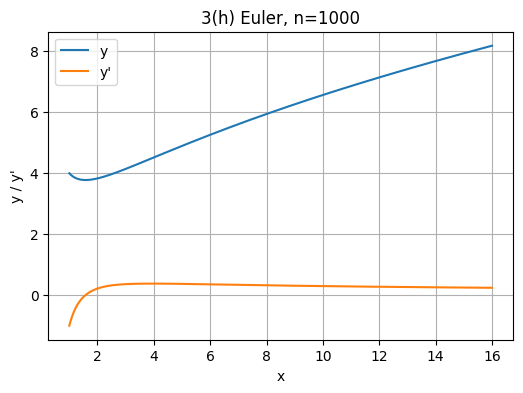

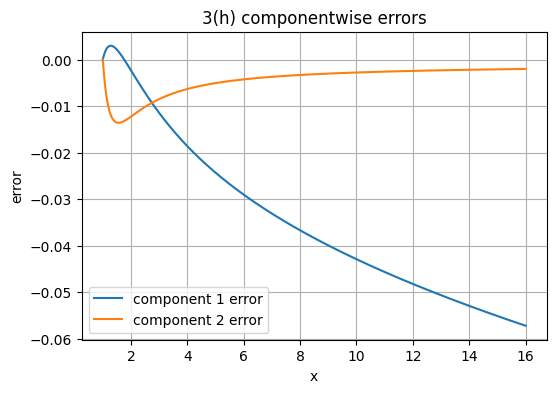

In [9]:
# (h) 2 x^2 y'' + 3x y' - y = 0,  1 < x < 16,  y(1)=4, y'(1)=-1;  ŷ(x) = 2(x^{1/2} + x^{-1})
f = lambda x, u: np.array([u[1], (u[0] - 3.0*x*u[1])/(2.0*x**2)])
y_exact = lambda x: 2.0*(np.sqrt(x) + 1.0/x)
yp_exact = lambda x: 1.0/np.sqrt(x) - 2.0/(x**2)

span = (1.0, 16.0); u0 = np.array([4.0, -1.0]); n = 1000
x, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(x, y, yp, "3(h) Euler, n=1000", "x", "y", "y'")
e1 = y_exact(x) - y
e2 = yp_exact(x) - yp
plot_errors(x, e1, e2, "3(h) componentwise errors", "x")

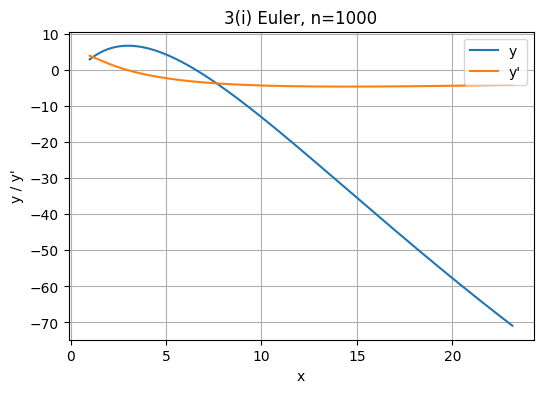

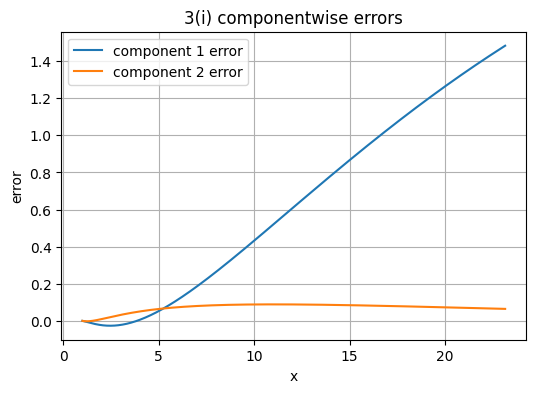

In [10]:
# (i) x^2 y'' - x y' + 2y = 0,  1 < x < e^{π},  y(1)=3, y'(1)=4;  ŷ(x) = x[3 cos(ln x) + sin(ln x)]
f = lambda x, u: np.array([u[1], (x*u[1] - 2.0*u[0])/(x**2)])
y_exact = lambda x: x*(3.0*np.cos(np.log(x)) + np.sin(np.log(x)))
yp_exact = lambda x: 4.0*np.cos(np.log(x)) - 2.0*np.sin(np.log(x))

span = (1.0, math.e**math.pi); u0 = np.array([3.0, 4.0]); n = 1000
x, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(x, y, yp, "3(i) Euler, n=1000", "x", "y", "y'")
e1 = y_exact(x) - y
e2 = yp_exact(x) - yp
plot_errors(x, e1, e2, "3(i) componentwise errors", "x")

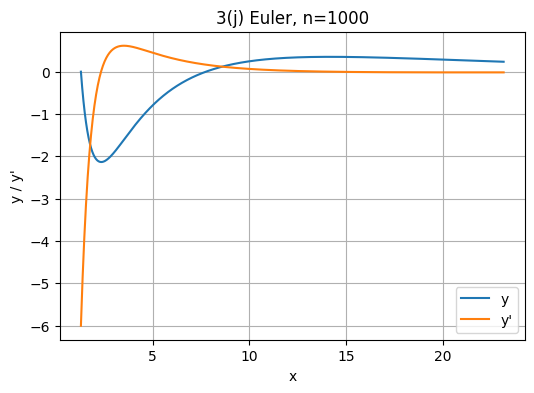

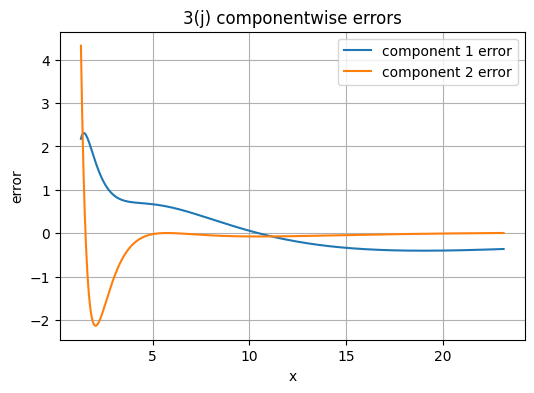

In [11]:
# (j) x^2 y'' + 3x y' + 4y = 0, e^{π/12} < x < e^{π}, y(e^{π/12})=0, y'(e^{π/12})=-6;
#     ŷ(x) = x^{-1}[ 3 cos(3 ln x) + sin(3 ln x) ]
f = lambda x, u: np.array([u[1], -(3.0*x*u[1] + 4.0*u[0])/(x**2)])
y_exact = lambda x: (3.0*np.cos(3.0*np.log(x)) + np.sin(3.0*np.log(x)))/x
yp_exact = lambda x: (6.0*np.cos(3.0*np.log(x)) - 10.0*np.sin(3.0*np.log(x)))/(x**2)

a = math.e**(math.pi/12.0); b = math.e**(math.pi)
span = (a, b); u0 = np.array([0.0, -6.0]); n = 1000
x, U = euler_vec(f, span, u0, n)
y, yp = U[:,0], U[:,1]

plot_two_curves(x, y, yp, "3(j) Euler, n=1000", "x", "y", "y'")
e1 = y_exact(x) - y
e2 = yp_exact(x) - yp
plot_errors(x, e1, e2, "3(j) componentwise errors", "x")

## Exercise 4 — SIR model (RK4 solver)
$v' = 0.2(1-v) - 3 v w,\quad w' = (3v - 1)w,\quad v(0)=0.95,\ w(0)=0.05$

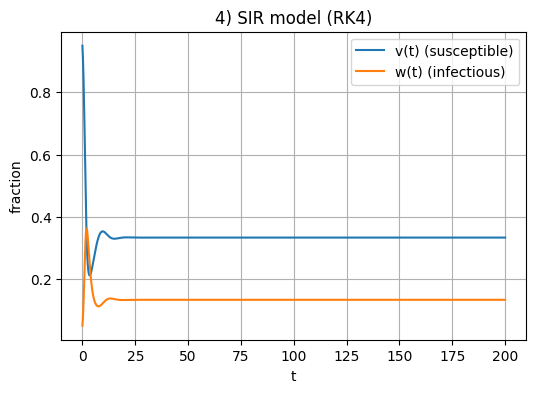

Approx. steady values at t=200.0: v≈0.333333, w≈0.133333


In [12]:
def sir_rhs(t, U):
    v, w = U
    dv = 0.2*(1.0 - v) - 3.0*v*w
    dw = (3.0*v - 1.0)*w
    return np.array([dv, dw])

t, UW = rk4_vec(sir_rhs, (0.0, 200.0), np.array([0.95, 0.05]), 8000)
v, w = UW[:,0], UW[:,1]

plt.figure(figsize=(6,4))
plt.plot(t, v, label="v(t) (susceptible)")
plt.plot(t, w, label="w(t) (infectious)")
plt.title("4) SIR model (RK4)")
plt.xlabel("t")
plt.ylabel("fraction")
plt.grid(True)
plt.legend()
plt.show()

print(f"Approx. steady values at t={t[-1]:.1f}: v≈{v[-1]:.6f}, w≈{w[-1]:.6f}")

## Exercise 5 — Phase plane (RK4 solver), $0\le t\le 10$, aspect ratio 1

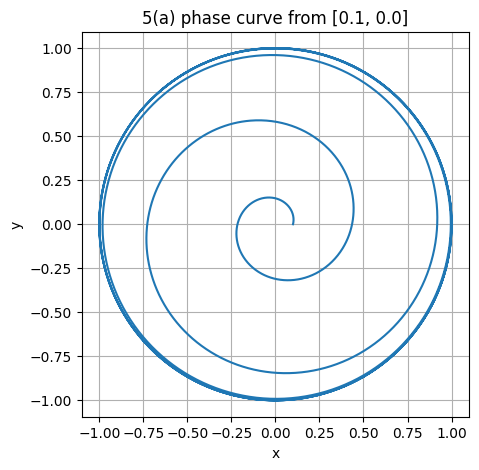

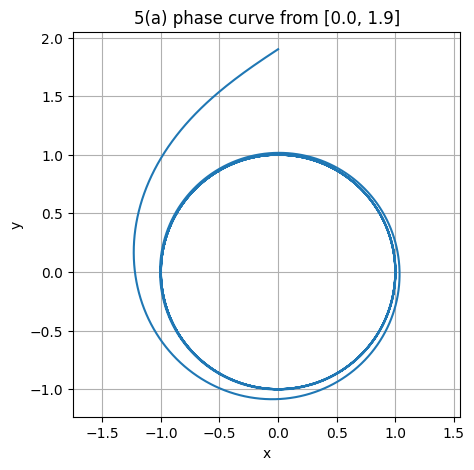

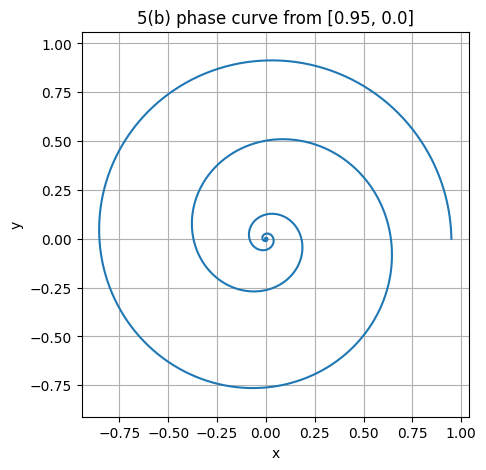

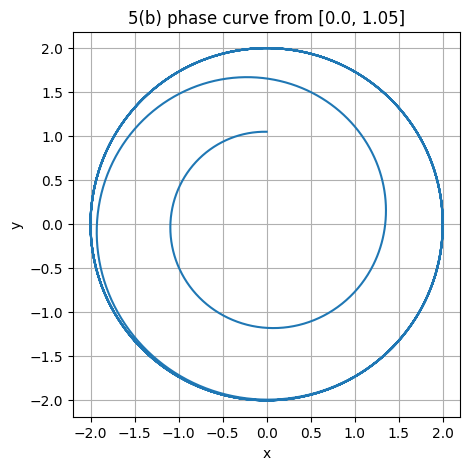

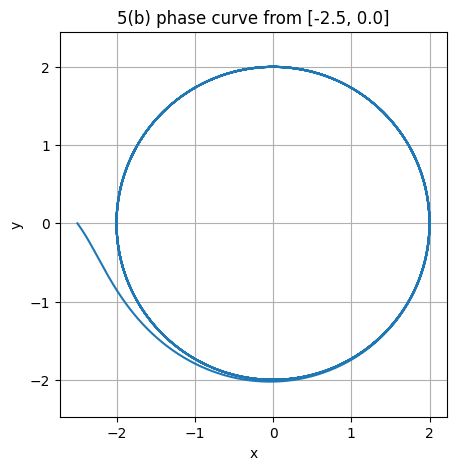

In [13]:
def sys5a(t, U):
    x, y = U
    return np.array([-4.0*y + x*(1.0 - x**2 - y**2),
                     4.0*x + y*(1.0 - x**2 - y**2)])

def sys5b(t, U):
    x, y = U
    common = (1.0 - x**2 - y**2)*(4.0 - x**2 - y**2)
    return np.array([-4.0*y - 0.25*x*common,
                     4.0*x - 0.25*y*common])

def phase_curve(rhs, u0, T=10.0, n=4000):
    t, U = rk4_vec(rhs, (0.0, T), np.array(u0, dtype=float), n)
    return U[:,0], U[:,1]

# (a)
for u0 in ([0.1,0.0], [0.0,1.9]):
    x, y = phase_curve(sys5a, u0)
    plt.figure(figsize=(5,5))
    plt.plot(x, y)
    plt.title(f"5(a) phase curve from {u0}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.axis('equal'); plt.grid(True)
    plt.show()

# (b)
for u0 in ([0.95,0.0], [0.0,1.05], [-2.5,0.0]):
    x, y = phase_curve(sys5b, u0)
    plt.figure(figsize=(5,5))
    plt.plot(x, y)
    plt.title(f"5(b) phase curve from {u0}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.axis('equal'); plt.grid(True)
    plt.show()